# Sena Ezgi Anadollu - 201401017


## Imports

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

## Read Data 

In [3]:
data = pd.read_csv("stocks.csv")

In [4]:
data.groupby(["Ticker"]).count()

,Date,Open,High,Low,Close,Adj Close,Volume
Ticker,,,,,,,
AAPL,62,62,62,62,62,62,62
GOOG,62,62,62,62,62,62,62
MSFT,62,62,62,62,62,62,62
NFLX,62,62,62,62,62,62,62


In [78]:
data_aapl = data[data["Ticker"] == "AAPL"]
data_goog = data[data["Ticker"] == "GOOG"]
data_msft = data[data["Ticker"] == "MSFT"]
data_nflx = data[data["Ticker"] == "NFLX"]

In [6]:
data.head(100) 

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
95,MSFT,2023-03-27,280.500000,281.459991,275.519989,276.380005,276.380005,26840200
96,MSFT,2023-03-28,275.790009,276.140015,272.049988,275.230011,275.230011,21878600
97,MSFT,2023-03-29,278.959991,281.140015,278.410004,280.510010,280.510010,25087000
98,MSFT,2023-03-30,284.230011,284.459991,281.480011,284.049988,284.049988,25053400


# Exploring Data


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [9]:
data.dtypes

Ticker        object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
data.shape

(248, 8)

In [11]:
data.isnull().any()

Ticker       False
Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [14]:
data.duplicated().sum()

0

In [15]:
# Calculate correleation  
correleation = data.corr()
correleation.head()

/var/folders/k7/rkwcp6pd0vn42m0g7j349s9r0000gn/T/ipykernel_12664/3772923103.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correleation = data.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999626,0.999650,0.999176,0.999173,-0.547741
High,0.999626,1.000000,0.999654,0.999644,0.999640,-0.546175
Low,0.999650,0.999654,1.000000,0.999663,0.999661,-0.544590
Close,0.999176,0.999644,0.999663,1.000000,0.999999,-0.544194
Adj Close,0.999173,0.999640,0.999661,0.999999,1.000000,-0.544370


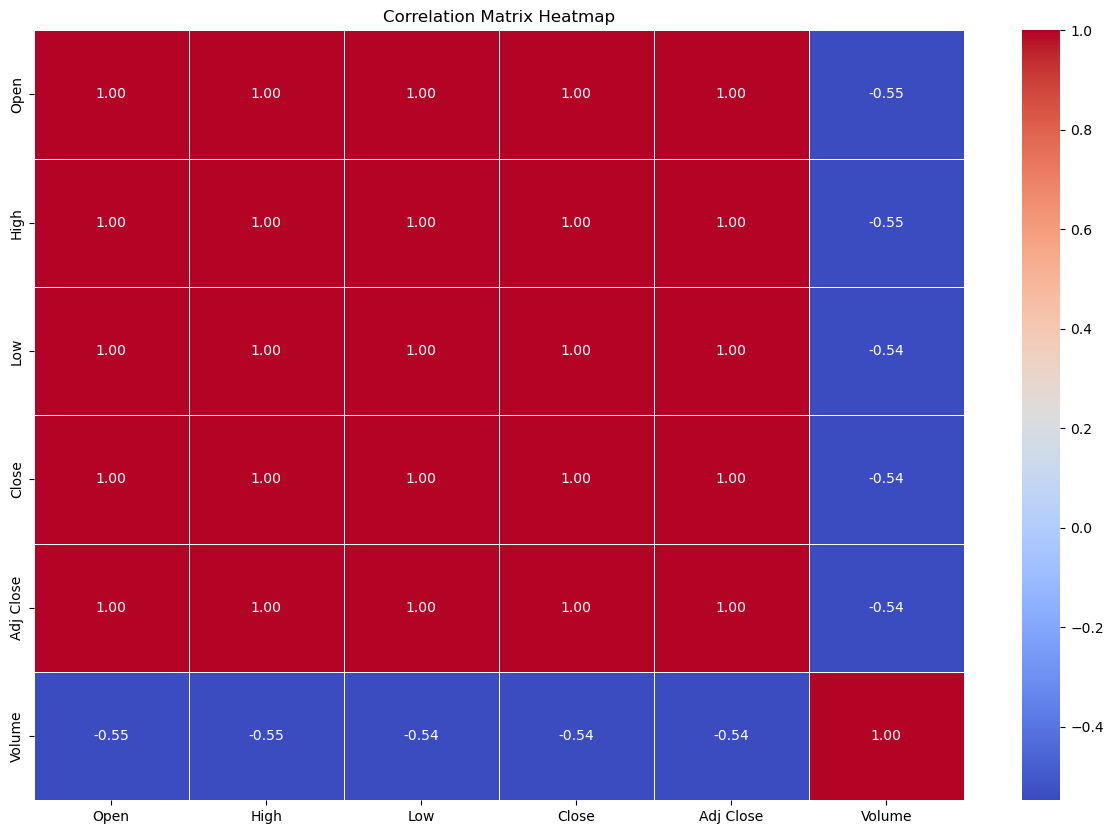

In [16]:
## Draw Correleation 
plt.figure(figsize=(15,10))
sns.heatmap(correleation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

Interpretation
High Correlation Between Prices: The 'Open', 'High', 'Low', 'Close', and 'Adj Close' have a perfect positive correlation with each other, indicated by the value of 1.00 in bright red. This means they move in the same direction; when one price increases, the others tend to increase as well, which is typical in stock market data because these prices are all based on the same underlying stock movements throughout the trading day.

Negative Correlation with Volume: The 'Volume' has a moderately negative correlation with all the price attributes, ranging from -0.54 to -0.55, shown in blue. This suggests that on days when the trading volume is higher, the stock prices might tend to decrease, or on days with lower trading volume, the stock prices might tend to increase. This negative correlation could be due to a variety of market factors.


# Data Visualization

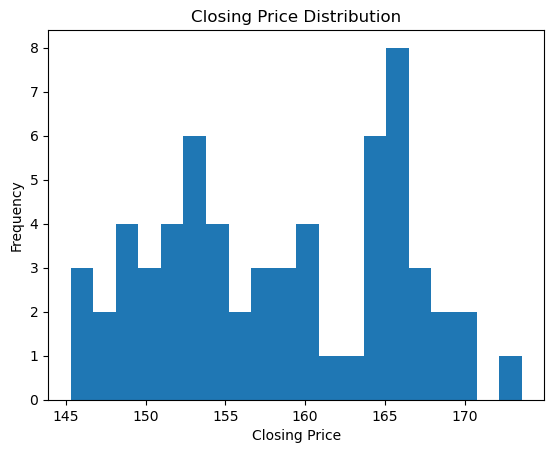

In [19]:
# the distribution of the closing prices to understand their range and frequency.
plt.hist(data_aapl['Close'], bins=20)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Closing Price Distribution')
plt.show()

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Total Volume by Ticker')

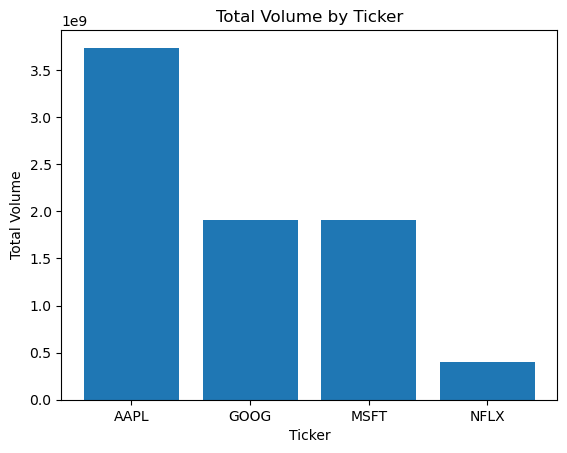

In [21]:
#the cumulative volume traded over time to observe any trends or spikes.
ticker_volume = data.groupby(["Ticker"])["Volume"].sum()
plt.bar(ticker_volume.index, ticker_volume.values)
plt.xlabel('Ticker')
plt.ylabel('Total Volume')
plt.title('Total Volume by Ticker')


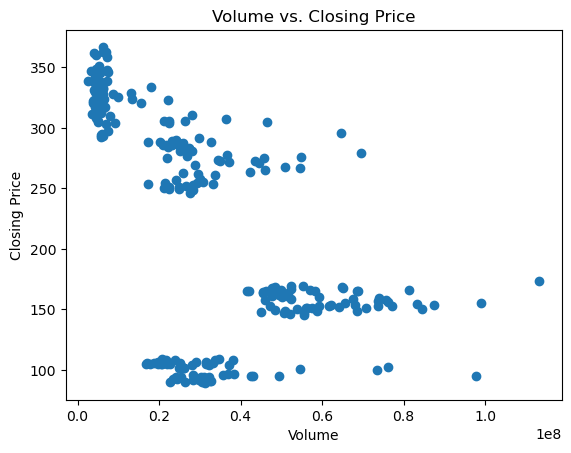

In [22]:
#Exploring the relationship between volume and closing prices, to identify any correlations.
plt.scatter(data['Volume'], data['Close'])
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Volume vs. Closing Price')
plt.show()

In [25]:
fig = px.area(data, x=data['Date'], y=data['Close'], color=data['Ticker'],
              facet_col=data['Ticker'],
              labels={'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company'},
              title='Stock Prices for Apple, Microsoft, Netflix, and Google')
fig.show()